In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pickle
# import folium
# import statsmodels.api as sm
# from statsmodels.tsa.seasonal import STL
# from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge

from PIL import Image
# from typing import Callable
# from datetime import datetime
from helper_functions import *
from skimage.morphology import *
import cv2

### Detecting circles by resizing the image

In [9]:
def plot_2_imgs(img_chf, img_eur, chf_title, eur_title, color_map):
    """
    Create 1 figure with 2 images.

    Args
    ----
    img 1: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    title 1: float
        Title of the 1st image
    img 2: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    title 2: float
        Title of the 1st image

    Return
    ------
    """
    # Create a figure with subplots
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Display the images
    ax[0].imshow(img_chf, cmap = color_map)
    ax[0].set_title(chf_title)  # Set title for the first image
    ax[1].imshow(img_eur, cmap =  color_map)
    ax[1].set_title(eur_title)  # Set title for the second image

    # Remove the axis ticks
    ax[0].axis('off')
    ax[1].axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [ ]:
# Read image. 
img_chf = cv2.imread('./data/ref/ref_chf.JPG', cv2.IMREAD_COLOR) 
img_ref_chf = np.array(Image.open('./data/ref/ref_chf.JPG'))

# Specify the scale factor (e.g., reduce to 50% of original size)
scale_percent = 10  # Example scale percentage

# Get the new dimensions
new_width = int(img_chf.shape[1] * scale_percent / 100)
new_height = int(img_chf.shape[0] * scale_percent / 100)

# Resize the image
img_resized = cv2.resize(img_chf, (new_width, new_height), interpolation=cv2.INTER_AREA)
img_ref_resized = cv2.resize(img_ref_chf, (new_width, new_height), interpolation=cv2.INTER_AREA)
img_ref_resized = cv2.blur(img_ref_resized)

plot_2_imgs(img_chf, img_ref_resized, "Original", "Resized", 'viridis')

# Convert to gray
gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY) 


## Threshold

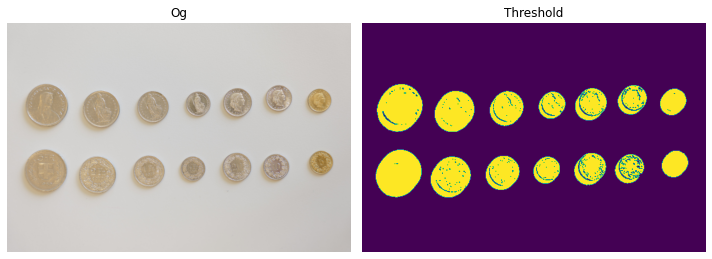

In [19]:
# Set thresholds for each component
h_T = 0.2
s_T = 0.1
v_T = 0.9
# Use the previous function to extract HSV channels
data_h, data_s, data_v = extract_hsv_channels(img=img_ref_resized)

# Threshold data
h_th = data_h < h_T
s_th = data_s > s_T
v_th =  data_v < v_T
#v_th = img_he < v_T
# Reconstruct image

img_th = np.logical_and(h_th, np.logical_and(s_th, v_th))

plot_2_imgs(img_ref_resized, img_th, "Og","Threshold", 'viridis')

## Detect circles

False
Number of circles detected: 7


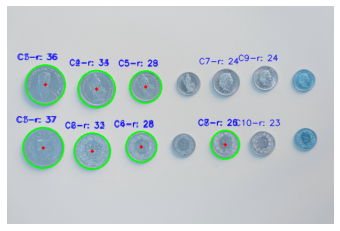

: 

In [30]:
# Convert the image to np.uint8 data type
img_uint8 = img_th.astype(np.uint8)
detected_circles = cv2.HoughCircles(gray,
                                    cv2.HOUGH_GRADIENT, 
                                    1, 
                                    24, 
                                    param1=68,
                                    param2=34, 
                                    minRadius=23, 
                                    maxRadius=50)

print(detected_circles is None)

# Assuming `img` is the original image on which you want to draw the circles
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))

    for i, pt in enumerate(detected_circles[0, :]):
        a, b, r = pt[0], pt[1], pt[2]

        # Draw the circumference of the circle.
        cv2.circle(img_ref_resized, (a, b), r, (0, 255, 0), 2)

        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img_ref_resized, (a, b), 1, (0, 0, 255), 3)

        # Label each circle with its radius
        label = f"C{i+1}-r: {r}"
        cv2.putText(img_ref_resized, label, (a - 50, b - r - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (255, 0, 0), 1, cv2.LINE_AA)
        
    # display the number of cercles detected
    print(f"Number of circles detected: {detected_circles.shape[1]}")
    
    # Display the result
    plt.imshow(cv2.cvtColor(img_ref_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

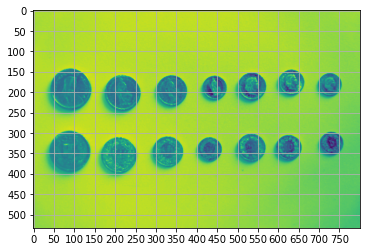

In [3]:
# CHF 

# Read image. 
img_chf = cv2.imread('./data/ref/ref_chf.JPG', cv2.IMREAD_COLOR) 

# Convert to grayscale. 
gray = cv2.cvtColor(img_chf, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray)

# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 

# plt.imshow(gray_blurred)

# Define the new width and height
# You can adjust these values based on your requirements
new_width = 800
new_height = int((new_width / gray.shape[1]) * gray.shape[0])


# Resize the image
resized_gray = cv2.resize(gray, (new_width, new_height))

# You might want to apply blurring to the resized image as well
resized_gray_blurred = cv2.blur(resized_gray, (3, 3))

# add gird
plt.grid(True)
plt.xticks(np.arange(0, new_width, 50))
plt.yticks(np.arange(0, new_height, 50))
# Display the resized image
plt.imshow(resized_gray_blurred)

In [27]:
detected_circles = cv2.HoughCircles(img_resized,
                                    cv2.HOUGH_GRADIENT, 
                                    1, 
                                    24, 
                                    param1=68,
                                    param2=34, 
                                    minRadius=23, 
                                    maxRadius=50)

# Assuming `img` is the original image on which you want to draw the circles
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))

    for i, pt in enumerate(detected_circles[0, :]):
        a, b, r = pt[0], pt[1], pt[2]

        # Draw the circumference of the circle.
        cv2.circle(img_resized, (a, b), r, (0, 255, 0), 2)

        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img_resized, (a, b), 1, (0, 0, 255), 3)

        # Label each circle with its radius
        label = f"C{i+1}-r: {r}"
        cv2.putText(img_resized, label, (a - 50, b - r - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (255, 0, 0), 1, cv2.LINE_AA)
        
    # display the number of cercles detected
    print(f"Number of circles detected: {detected_circles.shape[1]}")
    
    # Display the result
    plt.imshow(cv2.cvtColor(resized_gray_blurred, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# # Display the image after all circles have been drawn
# cv2.imshow("Detected Circle", resized_gray_blurred)
# cv2.waitKey(0)
# cv2.destroyAllWindows()  # It's good practice to destroy all windows after the display is no longer needed


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\hough.cpp:2257: error: (-215:Assertion failed) !_image.empty() && _image.type() == CV_8UC1 && (_image.isMat() || _image.isUMat()) in function 'cv::HoughCircles'


#### Test it with the noisy image, here we needed to change the value of param1 and param2 

**param1** (Upper Threshold for the Internal Canny Edge Detector)
> *Description*: This is the higher threshold of the two thresholds used by the Canny edge detector. The Canny edge detection algorithm is a multi-stage process that involves blurring, finding gradients, and then applying non-maximum suppression followed by double thresholding to determine potential edges.

> *Role in Circle Detection*: In the context of detecting circles, the Canny edge detector is used to find edges from which the Hough transform can infer circles. The higher threshold (param1) is critical because it directly influences which gradients (edges) are considered strong enough to potentially form part of a circle.

> *Example*: If param1 is set too low, the edge detector might pick up too many spurious edges, leading to false circles or clutter. If it's set too high, some real edges might not be detected at all, causing some circles to be missed. For an image with moderate contrast, a value around 100 to 200 often works well, but this needs tuning depending on the specific image characteristics.

**param2** (Threshold for Center Detection)
> *Description*: This parameter is used by the circle detection stage to decide when a candidate circle is truly a circle. It represents the threshold for the accumulator in the Hough transform. The accumulator space is used for voting on the radius and center of potential circles, based on the gradient information collected during the edge detection.

> *Role in Circle Detection*: After edges are detected using the Canny method, the Hough transform accumulates votes for potential circle centers in a discretized parameter space. If a particular candidate accumulates a total vote that exceeds param2, it is considered to be a valid circle.

> *Example*: If param2 is set too low, you might end up detecting too many false circles as minor variations in edge data could be incorrectly interpreted as circles. If it's set too high, only the most prominent circles with clear edges will be detected, possibly missing weaker or partially obscured circles. Adjusting param2 is essential for balancing sensitivity and specificity of detection.

Number of circles detected: 5


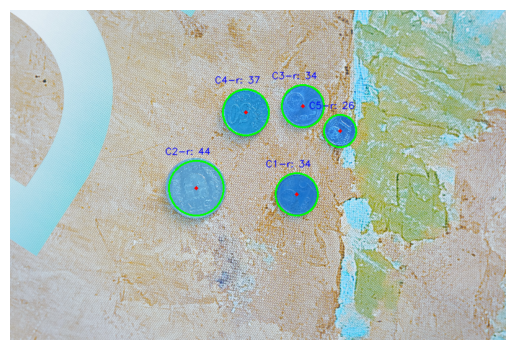

In [5]:
img_noisy = np.array(Image.open('./train/2. noisy_bg/L1010325.JPG'))

# Set thresholds for each component
h_T = 0.2
s_T = 0.1
v_T = 0.9
# Use the previous function to extract HSV channels
data_h, data_s, data_v = extract_hsv_channels(img=img_noisy)

# Threshold data
h_th = data_h < h_T
s_th = data_s > s_T
v_th =  data_v < v_T
#v_th = img_he < v_T
# Reconstruct image

img_noisy_th = np.logical_and(h_th, np.logical_and(s_th, v_th))
# values = [0.1,0.25,0.7]

img_th = img_noisy_th

# Convert the logical mask to uint8
img_th_uint8 = np.uint8(img_th * 255)  # Convert boolean to 0 or 255

# Optional: Apply a Gaussian blur to smooth the edges (you can adjust the kernel size as needed)
img_blurred = cv2.GaussianBlur(img_th_uint8, (9, 9), 0)

# Define the new width and height
# You can adjust these values based on your requirements
new_width = 800
new_height = int((new_width / gray.shape[1]) * img_blurred.shape[0])

# Resize the image
resized_gray = cv2.resize(img_blurred, (new_width, new_height))

resized_img_noisy = cv2.resize(img_noisy, (new_width, new_height))

# You might want to apply blurring to the resized image as well
resized_gray_blurred = cv2.blur(resized_gray, (3, 3))

# Apply HoughCircles on the blurred image
detected_circles = cv2.HoughCircles(resized_gray_blurred,
                                    cv2.HOUGH_GRADIENT,
                                    dp=1,          # Inverse ratio of the accumulator resolution
                                    minDist=20,    # Minimum distance between the centers of detected circles
                                    param1=68,     # Higher threshold for the internal Canny edge detector
                                    param2=34,     # Threshold for center detection
                                    minRadius=24,  # Minimum circle radius
                                    maxRadius=50)  # Maximum circle radius

# Assuming `img` is the original image on which you want to draw the circles
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))

    for i, pt in enumerate(detected_circles[0, :]):
        a, b, r = pt[0], pt[1], pt[2]

        # Draw the circumference of the circle.
        cv2.circle(resized_img_noisy, (a, b), r, (0, 255, 0), 2)

        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(resized_img_noisy, (a, b), 1, (0, 0, 255), 3)

        # Label each circle with its radius
        label = f"C{i+1}-r: {r}"
        cv2.putText(resized_img_noisy, label, (a - 50, b - r - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (255, 0, 0), 1, cv2.LINE_AA)
    
    # display the number of cercles detected
    print(f"Number of circles detected: {detected_circles.shape[1]}")
    
    # Display the result
    plt.imshow(cv2.cvtColor(resized_img_noisy, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

### Now that we have the found all the coins with they radius, let's try to be more precise with the original size of the image (4000, 6000)

Number of circles detected: 12


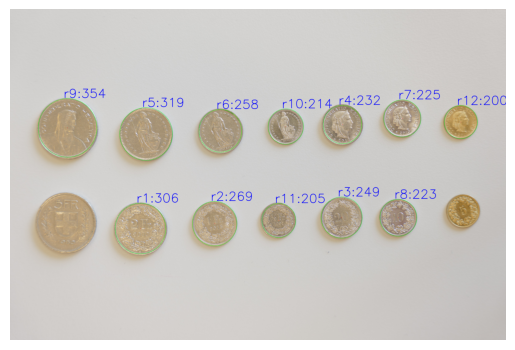

In [8]:
# CHF 

# Read image. 
img_chf = cv2.imread('./ref/ref_chf.JPG', cv2.IMREAD_COLOR) 

# Convert to grayscale. 
gray = cv2.cvtColor(img_chf, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray)

# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
plt.imshow(gray_blurred)

detected_circles = cv2.HoughCircles(gray_blurred,
                                    cv2.HOUGH_GRADIENT, 
                                    dp=1,          # Inverse ratio of the accumulator resolution
                                    minDist=350,    # Minimum distance between the centers of detected circles
                                    param1=110,     # Higher threshold for the internal Canny edge detector
                                    param2=45,     # Threshold for center detection
                                    minRadius=190,  # Minimum circle radius
                                    maxRadius=363)  # Maximum circle radius
            
# Assuming `img` is the original image on which you want to draw the circles
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))

    for i, pt in enumerate(detected_circles[0, :]):
        a, b, r = pt[0], pt[1], pt[2]

        # Draw the circumference of the circle.
        cv2.circle(img_chf, (a, b), r, (0, 255, 0), 2)

        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img_chf, (a, b), 1, (0, 0, 255), 3)

        # Label each circle with its radius
        label = f"r{i+1}:{r}"
        cv2.putText(img_chf, label, (a - 50, b - r - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    5, (255, 0, 0), 5, cv2.LINE_AA)
        
    # display the number of cercles detected
    print(f"Number of circles detected: {detected_circles.shape[1]}")
    
    # Display the result
    plt.imshow(cv2.cvtColor(img_chf, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

## Functions

In [28]:
def preprocess_image(img):
    """
    Convert image to grayscale and apply Gaussian blur.
    Args:
    img (numpy.ndarray): Original BGR image.

    Returns:
    numpy.ndarray: Blurred grayscale image.
    """
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Blur using 3 * 3 kernel
    gray_blurred = cv2.blur(gray, (3, 3))

    return gray_blurred

def detect_circles(gray_blurred, img, minDist=400, param1=105, param2=45):
    """
    Detect circles in an image using Hough Transform.
    Args:
    gray_blurred (numpy.ndarray): Preprocessed image.
    img (numpy.ndarray): Original BGR image to draw circles on.

    Returns:
    numpy.ndarray: Image with detected circles and annotations.
    """
    # Apply HoughCircles to detect circles
    detected_circles = cv2.HoughCircles(gray_blurred,
                                        cv2.HOUGH_GRADIENT, 
                                        dp=1,          # Inverse ratio of the accumulator resolution
                                        minDist=minDist,    # Minimum distance between the centers of detected circles
                                        param1=param1,     # Higher threshold for the internal Canny edge detector
                                        param2=param2,     # Threshold for center detection
                                        minRadius=190,  # Minimum circle radius of euro and chf coins
                                        maxRadius=363)  # Maximum circle radius of euro and chf coins

    # Check if any circles were detected
    if detected_circles is not None:
        detected_circles = np.uint16(np.around(detected_circles))

        for i, pt in enumerate(detected_circles[0, :]):
            a, b, r = pt[0], pt[1], pt[2]

            # Draw the circumference of the circle.
            cv2.circle(img, (a, b), r, (0, 255, 0), 2)

            # Draw a small circle to show the center.
            cv2.circle(img, (a, b), 1, (0, 0, 255), 3)

            # Label each circle with its radius
            label = f"r{i+1}:{r}"
            cv2.putText(img, label, (a - 50, b - r - 10), cv2.FONT_HERSHEY_SIMPLEX,
                        5, (255, 0, 0), 5, cv2.LINE_AA)

        # Display the number of circles detected
        print(f"Number of circles detected: {len(detected_circles[0])}")

    return img

## Test with other images 

In [10]:
img_euro = cv2.imread('./ref/ref_eur.JPG')
img_neutral = cv2.imread('./train/1. neutral_bg/L1010287.JPG')
img_noise = cv2.imread('./train/2. noisy_bg/L1010325.JPG')
img_hand = cv2.imread('./train/3. hand/L1010373.JPG')

Number of circles detected: 7


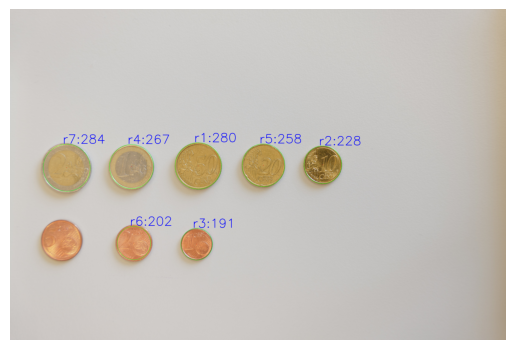

In [11]:
gray_blurred = preprocess_image(img_euro)
img_with_circles = detect_circles(gray_blurred, img_euro.copy(), param1=100, param2=50)  # Use a copy for drawing to preserve the original

# Display the result
plt.imshow(cv2.cvtColor(img_with_circles, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Number of circles detected: 8


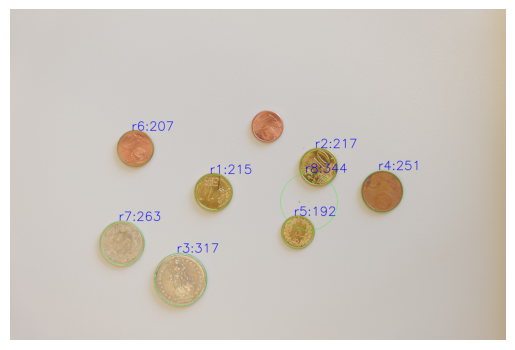

In [16]:
gray_blurred = preprocess_image(img_neutral)
img_with_circles = detect_circles(gray_blurred, img_neutral.copy(), param1=100, param2=50)  # Use a copy for drawing to preserve the original

# Display the result
plt.imshow(cv2.cvtColor(img_with_circles, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Number of circles detected: 4


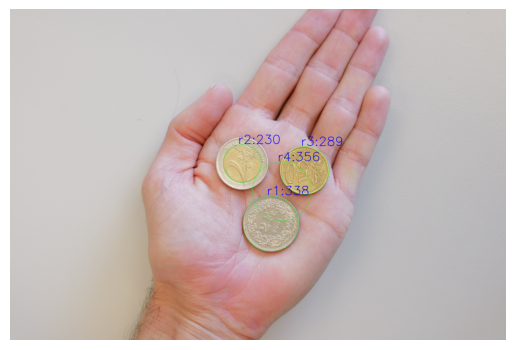

In [22]:
gray_blurred = preprocess_image(img_hand)
img_with_circles = detect_circles(gray_blurred, img_hand.copy(), param1=100, param2=50)  # Use a copy for drawing to preserve the original

# Display the result
plt.imshow(cv2.cvtColor(img_with_circles, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [84]:
# TOO MUCH NOISE --> too many circles detected

# gray_blurred = preprocess_image(img_noise)
# img_with_circles = detect_circles(gray_blurred, img_noise.copy(), param1=100, param2=50)  # Use a copy for drawing to preserve the original

# # Display the result
# plt.imshow(cv2.cvtColor(img_with_circles, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()

### We can remark that while for the neutral image, the accuracy is not that bad, for the images with hands and noise, we need more preprocessing (thresholding, ...)

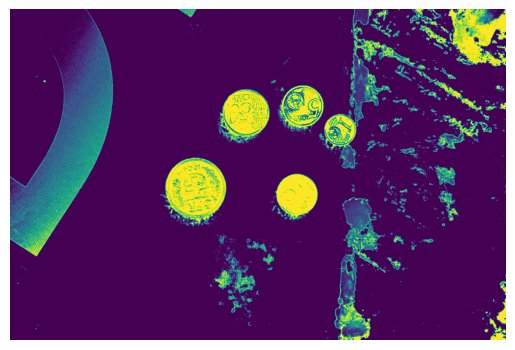

In [21]:
img_noise = np.array(Image.open('./train/2. noisy_bg/L1010325.JPG'))

# Set thresholds for each component
h_T = 0.2
s_T = 0.1
v_T = 0.9
# Use the previous function to extract HSV channels
data_h, data_s, data_v = extract_hsv_channels(img=img_noise)

# Threshold data
h_th = data_h < h_T
s_th = data_s > s_T
v_th =  data_v < v_T
#v_th = img_he < v_T
# Reconstruct image

img_noise_th = np.logical_and(h_th, np.logical_and(s_th, v_th))
# values = [0.1,0.25,0.7]

# Plot the image
plt.imshow(img_noise_th)
plt.axis('off')  # Turn off axis labels
plt.show()

In [19]:
# IT DID WORK WITH THE RESCALED IMAGE BUT NOT WITH THE ORIGINAL ONE, WE NEED TO REAJUST VALUES OF PARAM 1 AND 2
# Running time : 5min

# Convert the logical mask to uint8
img_th_uint8 = np.uint8(img_noise_th * 255)  # Convert boolean to 0 or 255

# Optional: Apply a Gaussian blur to smooth the edges (you can adjust the kernel size as needed)
img_blurred = cv2.GaussianBlur(img_th_uint8, (9, 9), 0)

img_with_circles = detect_circles(img_blurred, img_noise.copy(), param1=100, param2=50)  # Use a copy for drawing to preserve the original

Number of circles detected: 49


C:\Users\shuji\AppData\Local\Temp\ipykernel_37560\1567107072.py:53: RuntimeWarning: overflow encountered in scalar subtract
  cv2.putText(img, label, (a - 50, b - r - 10), cv2.FONT_HERSHEY_SIMPLEX,


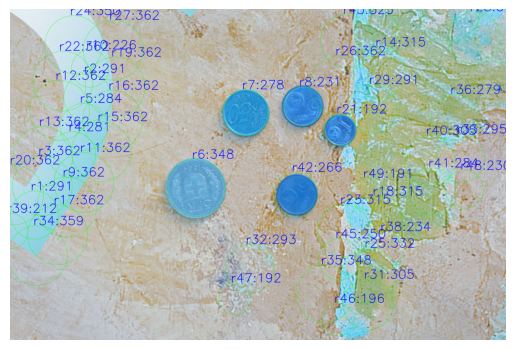

In [23]:
# Display the result
plt.imshow(cv2.cvtColor(img_with_circles, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Number of circles detected: 21


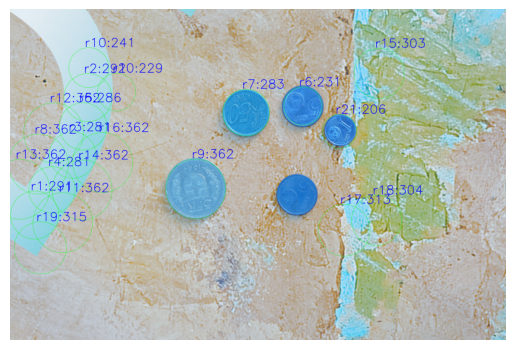

In [25]:
# IT DID WORK WITH THE RESCALED IMAGE BUT NOT WITH THE ORIGINAL ONE, WE NEED TO REAJUST VALUES OF PARAM 1 AND 2
# HERE WE PUT PARAM1=150 AND PARAM2=75
# Running time : 2 min

# Convert the logical mask to uint8
img_th_uint8 = np.uint8(img_noise_th * 255)  # Convert boolean to 0 or 255

# Optional: Apply a Gaussian blur to smooth the edges (you can adjust the kernel size as needed)
img_blurred = cv2.GaussianBlur(img_th_uint8, (9, 9), 0)

img_with_circles = detect_circles(img_blurred, img_noise.copy(), param1=150, param2=75)  # Use a copy for drawing to preserve the original

# Display the result
plt.imshow(cv2.cvtColor(img_with_circles, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Number of circles detected: 32


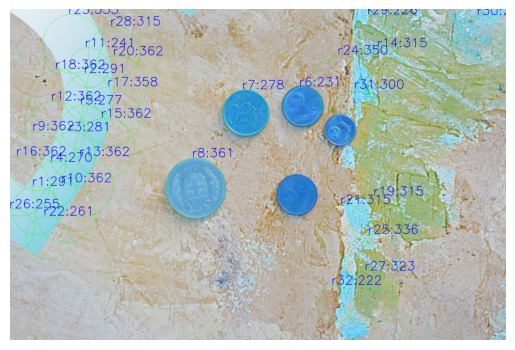

In [26]:
# IT DID WORK WITH THE RESCALED IMAGE BUT NOT WITH THE ORIGINAL ONE, WE NEED TO REAJUST VALUES OF PARAM 1 AND 2
# HERE WE PUT PARAM1=125 AND PARAM2=63
# Running time : 3 min 30

# Convert the logical mask to uint8
img_th_uint8 = np.uint8(img_noise_th * 255)  # Convert boolean to 0 or 255

# Optional: Apply a Gaussian blur to smooth the edges (you can adjust the kernel size as needed)
img_blurred = cv2.GaussianBlur(img_th_uint8, (9, 9), 0)

img_with_circles = detect_circles(img_blurred, img_noise.copy(), param1=125, param2=int(125/2))  # Use a copy for drawing to preserve the original

# Display the result
plt.imshow(cv2.cvtColor(img_with_circles, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Number of circles detected: 14


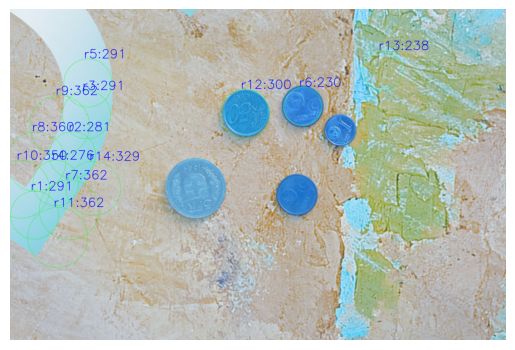

In [27]:
# IT DID WORK WELL WITH THE RESCALED IMAGE BUT NOT WITH THE ORIGINAL ONE, WE NEED TO REAJUST VALUES OF PARAM 1 AND 2
# HERE WE PUT PARAM1=175 AND PARAM2=87
# Running time : 1 min

# Convert the logical mask to uint8
img_th_uint8 = np.uint8(img_noise_th * 255)  # Convert boolean to 0 or 255

# Optional: Apply a Gaussian blur to smooth the edges (you can adjust the kernel size as needed)
img_blurred = cv2.GaussianBlur(img_th_uint8, (9, 9), 0)

img_with_circles = detect_circles(img_blurred, img_noise.copy(), param1=15, param2=int(175/2))  # Use a copy for drawing to preserve the original

# Display the result
plt.imshow(cv2.cvtColor(img_with_circles, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Number of circles detected: 19


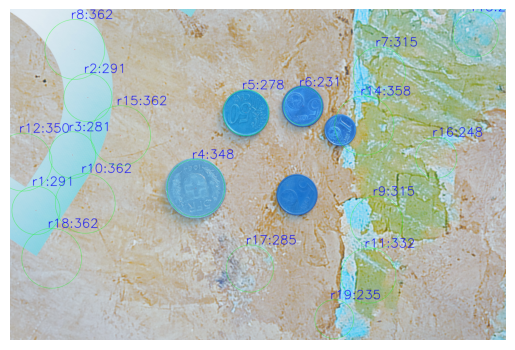

In [30]:
# IT DID WORK WELL WITH THE RESCALED IMAGE BUT NOT WITH THE ORIGINAL ONE, WE NEED TO REAJUST VALUES OF PARAM 1 AND 2
# HERE WE PUT PARAM1=110 AND PARAM2=55
# WE CHANGED THE MIN_DISTANCE TO 600
# Running time : 4 min

# Convert the logical mask to uint8
img_th_uint8 = np.uint8(img_noise_th * 255)  # Convert boolean to 0 or 255

# Optional: Apply a Gaussian blur to smooth the edges (you can adjust the kernel size as needed)
img_blurred = cv2.GaussianBlur(img_th_uint8, (9, 9), 0)

img_with_circles = detect_circles(img_blurred, img_noise.copy(), minDist= 600, param1=110, param2=int(110/2))  # Use a copy for drawing to preserve the original

# Display the result
plt.imshow(cv2.cvtColor(img_with_circles, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# IT DID WORK WELL WITH THE RESCALED IMAGE BUT NOT WITH THE ORIGINAL ONE, WE NEED TO REAJUST VALUES OF PARAM 1 AND 2
# HERE WE PUT PARAM1=100 AND PARAM2=50
# WE CHANGED THE MIN_DISTANCE TO 600
# Running time : 1 min

# Convert the logical mask to uint8
img_th_uint8 = np.uint8(img_noise_th * 255)  # Convert boolean to 0 or 255

# Optional: Apply a Gaussian blur to smooth the edges (you can adjust the kernel size as needed)
img_blurred = cv2.GaussianBlur(img_th_uint8, (9, 9), 0)

img_with_circles = detect_circles(img_blurred, img_noise.copy(), minDist= 600, param1=100, param2=int(100/2))  # Use a copy for drawing to preserve the original

# Display the result
plt.imshow(cv2.cvtColor(img_with_circles, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## How to improve detection (selon chatgpt):

Dealing with a high number of false positives and true negatives in a circle detection task using Hough Transform can be challenging. These issues typically indicate that the detection algorithm is either too sensitive, detecting non-circle objects as circles (false positives), or not sensitive enough, missing actual circles (true negatives). Here are some strategies you can use to improve accuracy:

1. **Adjust Detection Parameters :**
Tuning the parameters of the cv2.HoughCircles function can have a significant impact on reducing false positives and false negatives:
- Increase param1: This is the upper threshold for the internal Canny edge detector. Increasing this value will reduce the number of edges detected, potentially decreasing the number of false positives by ignoring weaker edges that might not be part of a circle.
- Increase param2: This parameter is the threshold for center detection in the accumulator space. Increasing it can help reduce false positives by requiring a stronger evidence of a complete circle before a detection is confirmed. However, setting it too high might increase true negatives by missing valid circles.
- Adjust minDist: This parameter controls the minimum distance between detected circle centers. Increasing it can help prevent multiple nearby detections of the same circle, thus reducing false positives.
- Refine minRadius and maxRadius: By accurately setting these parameters, you can filter out unwanted circles that are too small or too large compared to the expected sizes of the objects you are interested in.


2. **Improve Image Preprocessing :**
Enhancing the input image can significantly affect the outcome of the Hough Circle Transform:

- Apply Advanced Filtering: Besides simple blurring, consider using Gaussian or median blurring to reduce noise while preserving edges. Adaptive thresholding or other advanced techniques might also be beneficial.
- Edge Enhancement: Techniques such as applying a Sobel filter to enhance edges or using adaptive histogram equalization (CLAHE) can make the actual circles more distinct, which could help in reducing false negatives.


3. **Use More Advanced Circle Detection Techniques :**

If traditional Hough Transform parameters and preprocessing steps are not sufficient, consider alternative methods:

- Machine Learning Approaches: Train a machine learning model, such as a Convolutional Neural Network (CNN), specifically to recognize and localize circles (or coins, if that's the object of interest). This can often surpass traditional methods in both accuracy and robustness.
- Template Matching: If the circles you are detecting are of a known size and shape, template matching can be a precise method to locate these objects in the image.


4. **Post-Processing of Results :**

After detecting circles, apply additional criteria to filter out improbable results based on domain-specific knowledge:

- Geometric Constraints: Analyze the geometric properties of detected circles, such as aspect ratio, area, and relative distances to other circles, and discard detections that do not meet expected criteria.
- Contextual Analysis: If additional information about the scene or expected circle configurations is available, use this to validate or invalidate detected circles.

5. **Iterative Testing and Evaluation :**

Constantly test and evaluate the output on a diverse set of images:

- Create a Test Set: Build a comprehensive test set that includes all possible variations in lighting, background, and object types present in your use case.
- Quantitative Metrics: Use metrics such as precision, recall, and F1-score to objectively assess improvements or regressions in performance as you tweak your approach.